In [1]:
# 서로 다른 내용의 데이터를 공동의 기준으로 합칠 때
#   - 공유 구역이 없거나
#   - 엄청 지저분할 수 있음

In [2]:
import	pandas	as	pd
import	numpy as np

data = pd.read_csv('DATA/공공보건의료기관현황_2.csv', index_col=0, encoding='utf-8-sig')
print(data.columns)
data.head()

Index(['병원 명', '설립형태', '근거 법령', '관계 행정기관', '관계 공공단체', '심평원 요양기관번호', '종별구분',
       '병상수', '소재지 우편번호', '주소', '홈페이지', '대표전화', 'FAX', '비고'],
      dtype='object')


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [3]:
# ['주소'] 칼럼 정보 확인
# 1) 긴 문자열: 공백 기준 나누기, 시-도 정보만 가져오기
# 2) 시도-군구로 나눈 컬럼에 별도로 넣기
data['주소'].head()

연번
1        강원도 춘천시 충열로 142번길 24-16
2               강원도 삼척시 오십천로 418
3            강원도 영월군 영월읍 중앙1로 59
4          강원도 원주시 서원대로 387(개운동)
5    강원도 강릉시 경강로 2007(남문동 164-1)
Name: 주소, dtype: object

In [4]:
addr = pd.DataFrame(data['주소'])
addr = addr['주소'].apply(lambda v:v.split()[:2])   # 공백 기준 구분 후 두 인덱스 자리만 가져옴
addr = pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [5]:
# 창원시, 경산시 등 잘못된 위치의 자료가 있다
print(addr['시도'].unique())

['강원도' '경기도' '경기' '경남' '창원시' '경상남도' '경상북도' '경산시' '경북' '인천광역시' '대구광역시'
 '전라남도' '대전광역시' '광주광역시' '제주특별자치도' '부산광역시' '전라북도' '충북' '서울특별시' '서울시'
 '부산특별시' '대전시' '충남' '전남' '충청남도' '울산광역시' '전북' '천안시' '충청북도']


<hr> 위치와 명명이 잘못된 데이터 변경

In [6]:
# '창원시' 주소 데이터 변경
addr[addr['시도']=='창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [7]:
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']
# 변경 내용 확인
addr.iloc[27], addr.iloc[31]

(시도    경상남도
 군구     창원시
 Name: 27, dtype: object,
 시도    경상남도
 군구     창원시
 Name: 31, dtype: object)

In [8]:
# .unique를 통해 확인된 지역 하나씩 바꾸기
addr[addr['시도'] == '경산시'], addr[addr['시도'] == '천안시']

(     시도   군구
 47  경산시  경안로,
       시도   군구
 209  천안시  동남구
 210  천안시  동남구)

In [9]:
addr.iloc[47] = ['경상북도', '경산시']
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

##### .apply( func. )

In [10]:
addr['시도'].unique()

# 이제 올바른 지역명으로 바꿔주기
# 1) 딕셔너리로 '자료 내 명칭' : '정정 명칭' 만듦
# 2) dict.get() => 키에 값이 없으면 None 리턴
#               => defalt= 값이 없을 때 출력할 내용
# 3) apply(lambda ) 에 적용!

addr_aliases =	{'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시',	'충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

addr['시도'].apply(lambda v:addr_aliases.get(v,v))  
# get(v, v): v를 찾고 없으면 v 출력 => 람다 통한 오류 방지

0       강원도
1       강원도
2       강원도
3       강원도
4       강원도
       ... 
222    충청북도
223    충청북도
224    충청북도
225    충청북도
226    충청북도
Name: 시도, Length: 227, dtype: object

In [11]:
# 군구 단위 데이터 확인
addr['군구'].unique()  # 아란 13길

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [12]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [13]:
addr.iloc[75] = ['제주특별자치도', '제주시']
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

<hr>  다시 합치기

In [14]:
# '시도군구' 컬럼 추가
addr['시도군구'] = addr.apply(lambda r:r['시도'] + ' ' + r['군구'], axis=1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [15]:
# '의료기관수' 컬럼 추가 -> 다른 데이터와 합칠 준비
addr['의료기관수'] = 0
addr.head()

,시도,군구,시도군구,의료기관수
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [16]:
# .groupby( ) : 조건에 맞는 함수끼리 묶음
# => .count() : 
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index=False).count())
addr_group.head()

,시도,군구,시도군구,의료기관수
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


<hr> 2. '행정구역시군별성별인구수.xlsx' 활용


In [17]:
population = pd.read_excel('DATA/행정구역시군구별성별인구수_2.xlsx', sheet_name='데이터', header=[0])
population.head()

,행정구역(시도)별1,행정구역(시군구)별2,총인구수 (명)
0,전국,소계,51325329
1,서울특별시,소계,9386034
2,서울특별시,종로구,139417
3,서울특별시,중구,121312
4,서울특별시,용산구,213151


In [18]:
population = population.rename(columns={'행정구역(시도)별1': '시도', '행정구역(시군구)별2' : '군구'})
population.head()

,시도,군구,총인구수 (명)
0,전국,소계,51325329
1,서울특별시,소계,9386034
2,서울특별시,종로구,139417
3,서울특별시,중구,121312
4,서울특별시,용산구,213151


In [19]:
# 앞뒤 공백 제거
row_count = population.shape[0]
for index in range(row_count):
    population['군구'][index] = population['군구'][index].strip()

# 시도군구 통합
population['시도군구'] = population.apply(lambda r:r['시도']+' '+r['군구'], axis=1)
population.head()

C:\Users\wjs31\AppData\Local\Temp\ipykernel_31616\624549349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['군구'][index] = population['군구'][index].strip()
C:\Users\wjs31\AppData\Local\Temp\ipykernel_31616\624549349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['군구'][index] = population['군구'][index].strip()
C:\Users\wjs31\AppData\Local\Temp\ipykernel_31616\624549349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,시도,군구,총인구수 (명),시도군구
0,전국,소계,51325329,전국 소계
1,서울특별시,소계,9386034,서울특별시 소계
2,서울특별시,종로구,139417,서울특별시 종로구
3,서울특별시,중구,121312,서울특별시 중구
4,서울특별시,용산구,213151,서울특별시 용산구


In [20]:
# 특정 열의 일부 항목 제거 방법
# => 해당 값 외의 값만 저장 [ data.col != 'del_val']
population = population[population.군구 != '소계']
population.head()

,시도,군구,총인구수 (명),시도군구
2,서울특별시,종로구,139417,서울특별시 종로구
3,서울특별시,중구,121312,서울특별시 중구
4,서울특별시,용산구,213151,서울특별시 용산구
5,서울특별시,성동구,277361,서울특별시 성동구
6,서울특별시,광진구,335554,서울특별시 광진구


In [21]:
# '시도군구'를 인덱스로
population = population.set_index('시도군구')
population.head()

,시도,군구,총인구수 (명)
시도군구,,,
서울특별시 종로구,서울특별시,종로구,139417
서울특별시 중구,서울특별시,중구,121312
서울특별시 용산구,서울특별시,용산구,213151
서울특별시 성동구,서울특별시,성동구,277361
서울특별시 광진구,서울특별시,광진구,335554


In [28]:
addr_group = addr_group.set_index('시도군구')
addr_group

,시도,군구,의료기관수
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1
...,...,...,...
충청북도 단양군,충청북도,단양군,1
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1


In [29]:
# [내부 조인] inner join
# - 둘 이상의 DF에서 조건에 맞는 행을 연결
# [외부 조인] outer join
# - 한쪽에만 존재하는 데이터를 다른 DF에 결합

# [ .merge() ] : inner, outer join하는 메서드
addr_population_merge = pd.merge(addr_group, population, how='inner',  left_index=True,   right_index=True)
addr_population_merge.head()

,시도_x,군구_x,의료기관수,시도_y,군구_y,총인구수 (명)
시도군구,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,209439
강원도 동해시,강원도,동해시,1,강원도,동해시,88625
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,62651
강원도 속초시,강원도,속초시,1,강원도,속초시,82054
강원도 양구군,강원도,양구군,1,강원도,양구군,21056


In [30]:
# 필요한 컬럼만 추출
local_medicalcenter_population = addr_population_merge[['시도_x', '군구_x', '의료기관수', '총인구수 (명)']]

# 컬럼 이름 변경
local_medicalcenter_population = local_medicalcenter_population.rename(columns={'시도_x':'시도', '군구_x':'군구', '의료기관수':'공공의료기관수', '총인구수 (명)':'인구수'})
local_medicalcenter_population.head()

,시도,군구,공공의료기관수,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,209439
강원도 동해시,강원도,동해시,1,88625
강원도 삼척시,강원도,삼척시,1,62651
강원도 속초시,강원도,속초시,1,82054
강원도 양구군,강원도,양구군,1,21056


In [31]:
mc_count =	local_medicalcenter_population['공공의료기관수']
local_medicalcenter_population['인구대비의료기관비율']	=	\
mc_count.div(local_medicalcenter_population['인구수'],	axis=0)*100000
local_medicalcenter_population.head()

,시도,군구,공공의료기관수,인구수,인구대비의료기관비율
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,209439,1.909864
강원도 동해시,강원도,동해시,1,88625,1.128350
강원도 삼척시,강원도,삼척시,1,62651,1.596144
강원도 속초시,강원도,속초시,1,82054,1.218710
강원도 양구군,강원도,양구군,1,21056,4.749240


<Axes: xlabel='시도군구'>

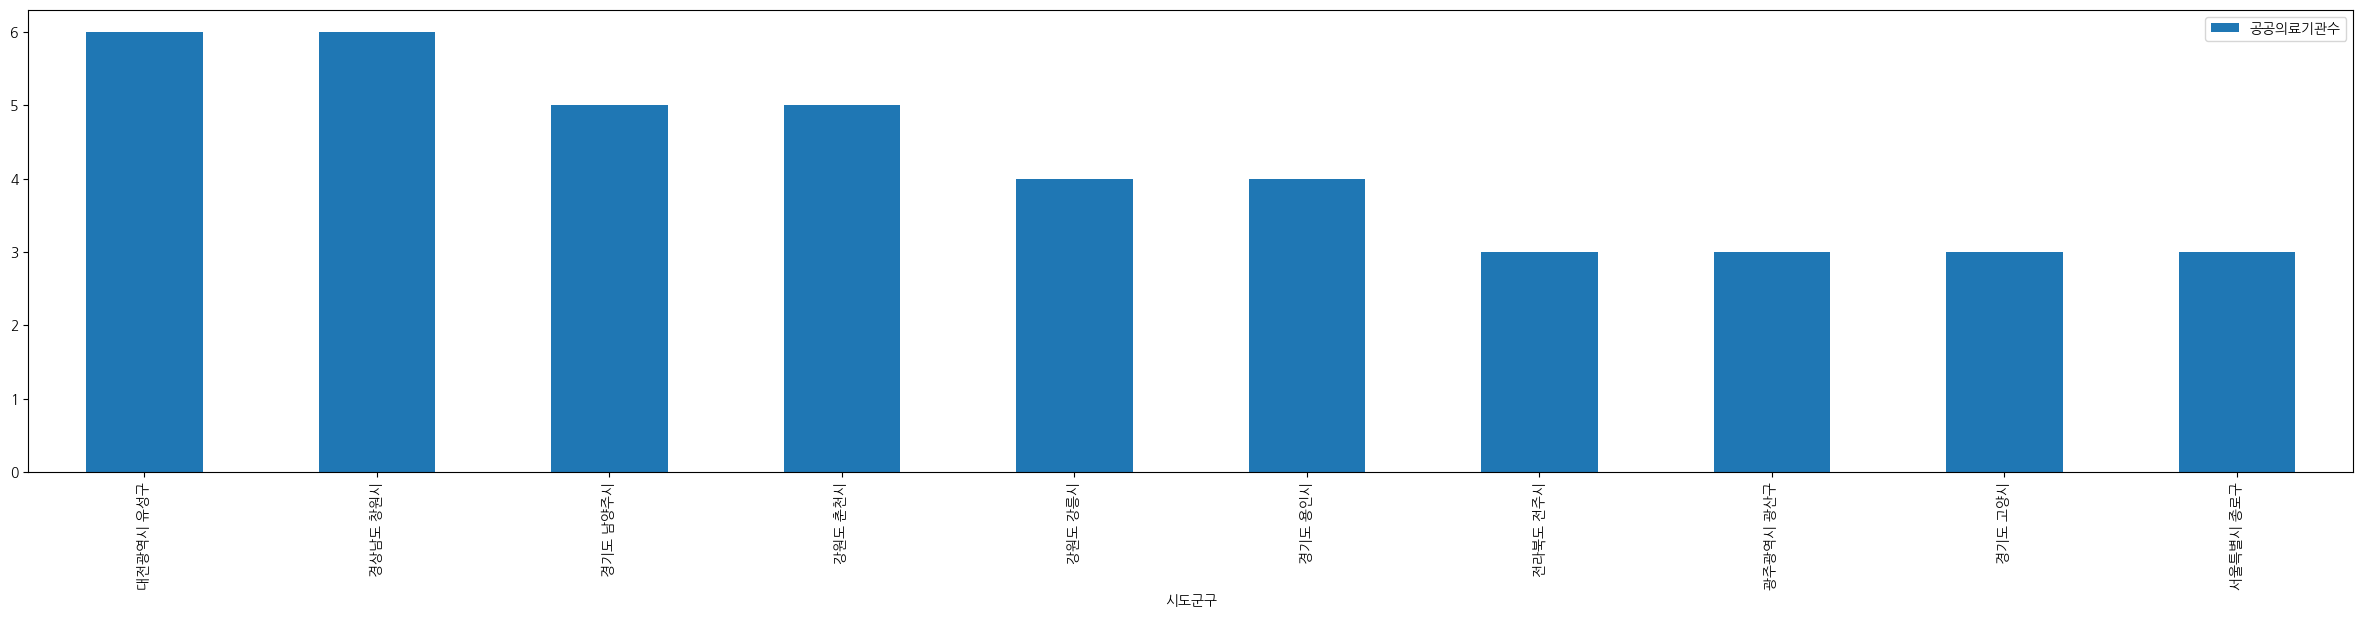

In [35]:
import matplotlib.pyplot as plt
import platform
import koreanize_matplotlib

mc_ratio =	local_medicalcenter_population[['공공의료기관수']]
mc_ratio =	mc_ratio.sort_values(by='공공의료기관수',	ascending=False)
mc_ratio.head(10).plot(kind='bar',	rot=90,	figsize=(30, 6))

In [ ]:
# Fin.